# Final Report - Data Science
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

`Gustavo Furini` - `gustavo.furini@pucpr.edu.br`

`Gabriel Maron` - `gabriel.maron@pucpr.edu.br`

`Vitoria Izabel` - `vitoria.pinto@pucpr.edu.br`

`Lucca Libanori` - `lucca.libanori@pucpr.edu.br`

`Leonardo Nervino` - `friedrich.leonardo@pucpr.edu.br`

`Henrique Conceição` - `henrique.conceicao@pucpr.edu.br`


`2023`

# Import the libs you need

In [1]:
# Import all packages you need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

In [2]:
# load your data here
df = pd.read_csv("/content/data.csv")
df.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
df['shot_distance'].describe()

count    30697.000000
mean        13.437437
std          9.374189
min          0.000000
25%          5.000000
50%         15.000000
75%         21.000000
max         79.000000
Name: shot_distance, dtype: float64

In [4]:
# TRANSFORMANDO DE PÉS PARA METROS

df['shot_distance'] = df['shot_distance'].apply(lambda x: x * 0.3048)
df['shot_distance'].describe()

count    30697.000000
mean         4.095731
std          2.857253
min          0.000000
25%          1.524000
50%          4.572000
75%          6.400800
max         24.079200
Name: shot_distance, dtype: float64

In [5]:
df['shot_zone_range'].unique()

array(['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

In [6]:
# 8 FT = 2,4
# 16 FT = 4,9
# 24 FT = 7,3

In [7]:
# MUDANDO OS VALORES DE PÉS PARA METROS NA COLUNA 'shot_zone_range'

conversoes_ft_to_m = {
    'Less Than 8 ft.': "Menos que 2,4 m",
    '16-24 ft.': '4,9 - 7,3 m',
    '24+ ft.': "Mais que 7,3 m",
    'Back Court Shot': 'Antes do meio',
    '8-16 ft.': '2,4 - 4,9m'
}

df['shot_zone_range'] = df['shot_zone_range'].map(lambda x: conversoes_ft_to_m.get(x, x))

In [8]:
df['shot_zone_range'].unique()

array(['4,9 - 7,3 m', '2,4 - 4,9m', 'Menos que 2,4 m', 'Mais que 7,3 m',
       'Antes do meio'], dtype=object)

# General Characteristics

In this section, you should report the main dataset chracteristics, including but not limited to:
* Number of instances
* Number of features
* Number of classes
* Class distribution

In [9]:
# use as many code and text cells you wish

print(f'NÚMERO DE INSTÂNCIAS: {df.shape[0]}')
print(f'NÚMERO DE CARACTERÍSTICAS: {df.shape[1]}')
print(f'NÚMERO DE CLASSES: 2 -> Acertou o arremesso (1) e Errou o arremesso (0)')
print(f'DISTRIBUIÇÃO DE CLASSES: ')
df['shot_made_flag'].value_counts()
print(f'PORCENTAGEM DE VALORES FALTANTES \n{df.isna().mean() * 100}')

NÚMERO DE INSTÂNCIAS: 30697
NÚMERO DE CARACTERÍSTICAS: 25
NÚMERO DE CLASSES: 2 -> Acertou o arremesso (1) e Errou o arremesso (0)
DISTRIBUIÇÃO DE CLASSES: 
PORCENTAGEM DE VALORES FALTANTES 
action_type            0.000000
combined_shot_type     0.000000
game_event_id          0.000000
game_id                0.000000
lat                    0.000000
loc_x                  0.000000
loc_y                  0.000000
lon                    0.000000
minutes_remaining      0.000000
period                 0.000000
playoffs               0.000000
season                 0.000000
seconds_remaining      0.000000
shot_distance          0.000000
shot_made_flag        16.288237
shot_type              0.000000
shot_zone_area         0.000000
shot_zone_basic        0.000000
shot_zone_range        0.000000
team_id                0.000000
team_name              0.000000
game_date              0.000000
matchup                0.000000
opponent               0.000000
shot_id                0.000000
dtype: flo

# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

****
**1. Qual é a distribuição dos arremessos no conjunto de dados de Kobe Bryant?**

Analisar a distribuição dos tipos de arremessos realizados por Kobe Bryant para ter uma noção de quais tipos de arremessos ele mais utilizava durante sua carreira na NBA.

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64


Text(0.5, 1.0, 'Distribuição de Arremessos por Tipo')

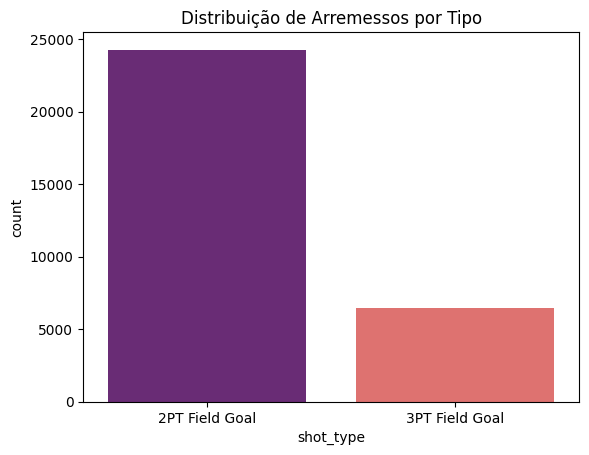

In [10]:
contagemTiposDeArremessos = df['shot_type'].value_counts()

print(contagemTiposDeArremessos)
sns.countplot(x=df['shot_type'], palette="magma")
plt.title('Distribuição de Arremessos por Tipo')

Essa análise mostra que Kobe Bryant preferia arremessos de 2 pontos e lances livres em sua carreira, enquanto arremessos de 3 pontos eram menos comuns em seu estilo de jogo. Assim conseguimos ter uma noção do tipo de arremessos que o Kobe preferia.

****
**2. QUAL É A DISTRIBUIÇÃO DOS ARREMESSOS PELA ZONA DA QUADRA?**

Ao analisar a distribuição dos arremessos por área da quadra, podemos obter informações sobre as preferências de Kobe em relação às regiões onde ele realizava seus arremessos com mais frequência.

Center(C)                13455
Right Side Center(RC)     4776
Right Side(R)             4588
Left Side Center(LC)      4044
Left Side(L)              3751
Back Court(BC)              83
Name: shot_zone_area, dtype: int64


Text(0.5, 1.0, 'Distribuição de Arremessos por Área da Quadra')

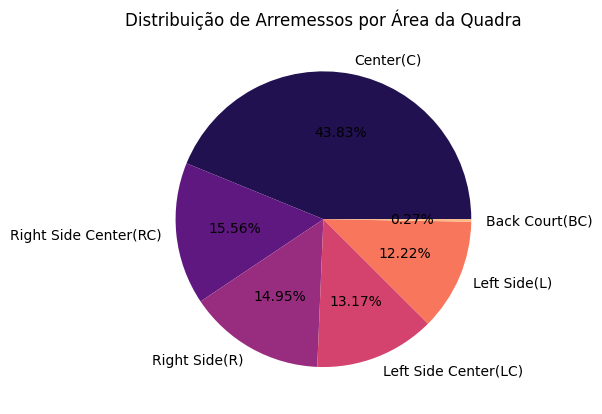

In [11]:
sns.set_palette("magma")

contagemPorZona = df['shot_zone_area'].value_counts()
print(contagemPorZona)

plt.pie(contagemPorZona, labels=contagemPorZona.index, autopct='%.2f%%')
plt.title('Distribuição de Arremessos por Área da Quadra')

A análise da distribuição de arremessos por área da quadra mostra que Kobe Bryant frequentemente realizava seus arremessos na área ao centro, seguida pelo lado direito da quadra.

****
**3. QUAL É A DISTRIBUIÇÃO DE ARREMESSOS POR ZONAS ESPECÍFICAS DA QUADRA?**

Ao analisar a distribuição de arremessos por zonas específicas da quadra, podemos identificar as áreas onde Kobe preferencialmente realizava seus arremessos.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mid-Range'),
  Text(1, 0, 'Restricted Area'),
  Text(2, 0, 'Above the Break 3'),
  Text(3, 0, 'In The Paint (Non-RA)'),
  Text(4, 0, 'Right Corner 3'),
  Text(5, 0, 'Left Corner 3'),
  Text(6, 0, 'Backcourt')])

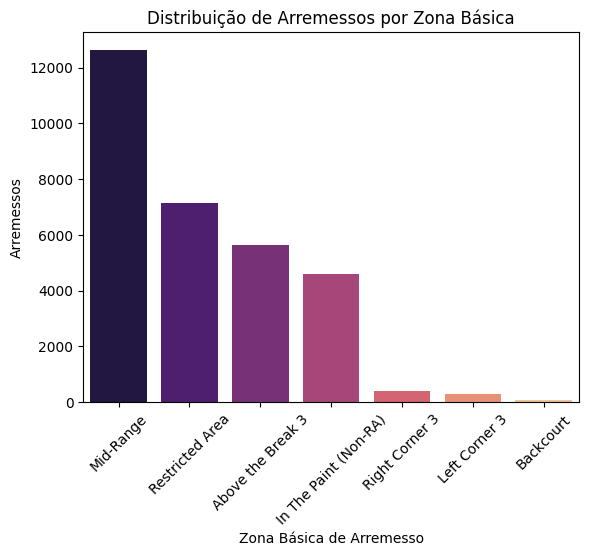

In [12]:
contagemZonaEspecifica = df['shot_zone_basic'].value_counts()

sns.barplot(x=contagemZonaEspecifica.index, y=contagemZonaEspecifica.values, palette="magma")
plt.xlabel('Zona Básica de Arremesso')
plt.ylabel('Arremessos')
plt.title('Distribuição de Arremessos por Zona Básica')
plt.xticks(rotation=45)

A análise da distribuição de arremessos por zonas específicas da quadra revela que Kobe Bryant realizava a maioria de seus arremessos do mid-range, seguida pela restricted area.

****
**4. QUAL É A DISTRIBUIÇÃO DOS ARREMESSOS POR ZONA DE DISTÂNCIA?**

Ao analisar a distribuição de arremessos por faixas de distância, podemos entender em quais intervalos de distância Kobe era mais ativo em termos de arremessos.

Text(0.5, 1.0, 'Distribuição de Arremessos por Faixa de Distância')

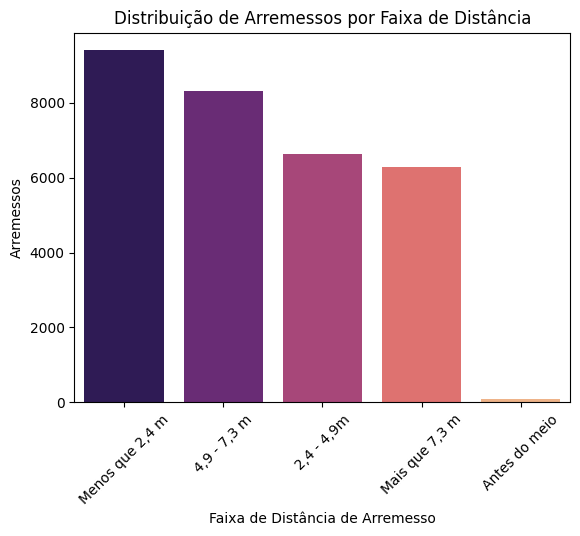

In [13]:
contagemPorDistancia = df['shot_zone_range'].value_counts()

sns.barplot(x=contagemPorDistancia.index, y=contagemPorDistancia.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel('Faixa de Distância de Arremesso')
plt.ylabel('Arremessos')
plt.title('Distribuição de Arremessos por Faixa de Distância')

A análise da distribuição de arremessos por faixas de distância mostra que Kobe Bryant realizava a maioria de seus arremessos na faixa de média distância (4,9-7,3 metros) e também em faixas mais curtas (menos de 2,4 m). Isso reflete suas habilidades em tiros de média distância e arremessos próximos à cesta.

****
**5. QUAL É A DISTRIBUIÇÃO DE ARREMESSOS POR PERIODO?**

A análise da distribuição de arremessos por período pode revelar se Kobe tinha alguma preferência por determinados momentos durante a partida.

Text(0.5, 1.0, 'Distribuição de Arremessos por Período de Jogo')

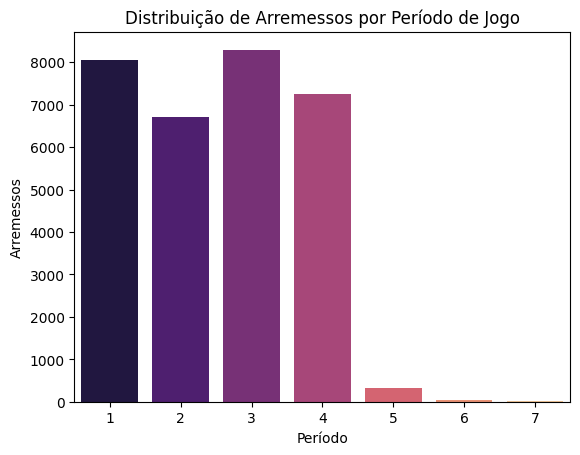

In [14]:
contagemPorPeriodo = df['period'].value_counts()

sns.barplot(x=contagemPorPeriodo.index, y=contagemPorPeriodo.values, palette="magma")
plt.xlabel('Período')
plt.ylabel('Arremessos')
plt.title('Distribuição de Arremessos por Período de Jogo')

A análise da distribuição de arremessos por período de jogo mostra que Kobe Bryant realizava a maioria de seus arremessos no terceiro período, seguido pelo primeiro e quarto períodos.

****
**6. QUAL A PORCENTAGEM DOS ARREMESSOS POR PERÍODO?**

 Calculando a distribuição percentual dos arremessos por período, podemos obter uma visão mais precisa da contribuição de Kobe em cada fase do jogo.

In [15]:
pct1periodo = 100 * df[df['period'] == 1].value_counts().count() / 30697
pct2periodo = 100 * df[df['period'] == 2].value_counts().count() / 30697
pct3periodo = 100 * df[df['period'] == 3].value_counts().count() / 30697
pct4periodo = 100 * df[df['period'] == 4].value_counts().count() / 30697
pct5periodo = 100 * df[df['period'] == 5].value_counts().count() / 30697
pct6periodo = 100 * df[df['period'] == 6].value_counts().count() / 30697
pct7periodo = 100 * df[df['period'] == 7].value_counts().count() / 30697

print(f'Porcentagem de arremessos no primeiro quarto: {pct1periodo :.2f}')
print(f'Porcentagem de arremessos no segundo quarto: {pct2periodo :.2f}')
print(f'Porcentagem de arremessos no terceiro quarto: {pct3periodo :.2f}')
print(f'Porcentagem de arremessos no quarto quarto: {pct4periodo :.2f}')
print(f'Porcentagem de arremessos no quinto quarto: {pct5periodo :.2f}')
print(f'Porcentagem de arremessos no sexto quarto: {pct6periodo :.2f}')
print(f'Porcentagem de arremessos no sétimo quarto: {pct7periodo :.2f}')

Porcentagem de arremessos no primeiro quarto: 21.83
Porcentagem de arremessos no segundo quarto: 18.36
Porcentagem de arremessos no terceiro quarto: 22.81
Porcentagem de arremessos no quarto quarto: 19.69
Porcentagem de arremessos no quinto quarto: 0.91
Porcentagem de arremessos no sexto quarto: 0.10
Porcentagem de arremessos no sétimo quarto: 0.02


Os cálculos de porcentagem dos arremessos por período fornecem uma visão mais detalhada da distribuição temporal do desempenho de Kobe Bryant durante os jogos.

****
**7. QUAL É A DISTRIBUIÇÃO DE ARREMESSOS EM PLAYSOFFS E TEMPORADA REGULAR?**

Ao analisar a distribuição de arremessos entre jogos de playoffs e temporada regular, podemos identificar a diferença da quantidade tentativas de arremessos .

Text(0.5, 1.0, 'Distribuição de Arremessos por Tipo de Jogo (Playoffs vs. Não Playoffs)')

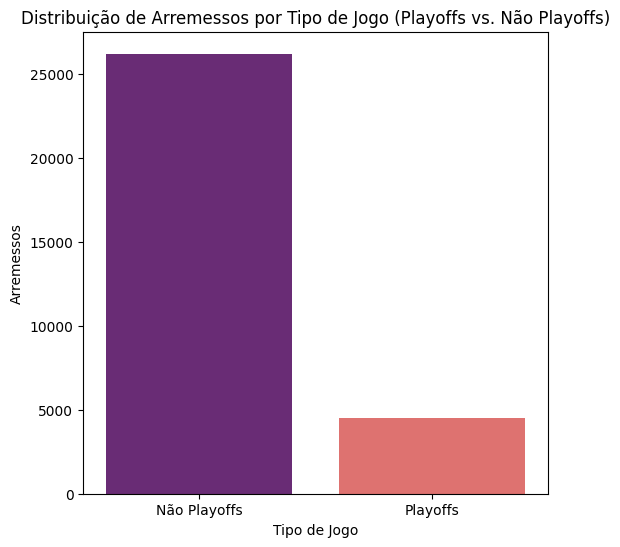

In [16]:

playoffs_counts = df['playoffs'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=playoffs_counts.index, y=playoffs_counts.values, palette="magma")
plt.xticks(ticks=[0, 1], labels=["Não Playoffs", "Playoffs"])
plt.xlabel('Tipo de Jogo')
plt.ylabel('Arremessos')
plt.title('Distribuição de Arremessos por Tipo de Jogo (Playoffs vs. Não Playoffs)')


A análise fornece uma visão geral da contribuição de Kobe em diferentes cenários de jogo.






****
**8. QUAL É A TAXA DE ACERTO DOS ARREMESSOS?**

A análise da taxa de acerto dos arremessos pode fornecer informações sobre a eficácia de Kobe em fazer arremessos bem-sucedidos.

Text(0.5, 1.0, 'Distribuição de Acertos e Erros')

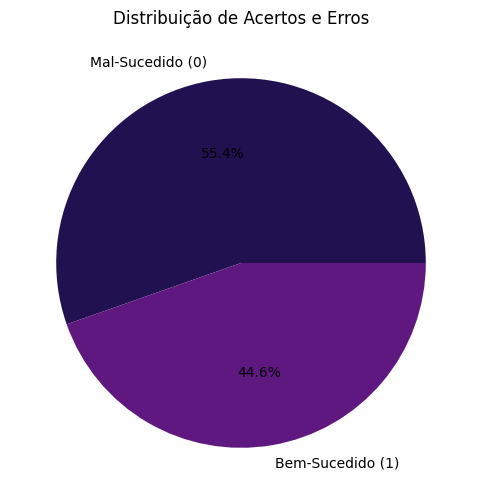

In [17]:

sns.set_palette("magma")

arremessos = df['shot_made_flag'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(arremessos, labels=["Mal-Sucedido (0)", "Bem-Sucedido (1)"], autopct='%1.1f%%')
plt.title('Distribuição de Acertos e Erros')


In [18]:
df['shot_made_flag'].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

A análise da taxa de acerto dos arremessos mostra a eficácia de Kobe Bryant em fazer arremessos bem-sucedidos em comparação com os arremessos mal-sucedidos.

****
**9. QUAL É A DISTRIBUIÇÃO DOS ARREMESSOS POR SEGUNDOS FALTANDO?**

 A análise da distribuição de arremessos em relação aos segundos restantes pode revelar padrões de arremesso em momentos cruciais do jogo.

Text(0.5, 1.0, 'Distribuição de Arremessos por Segundos Restantes')

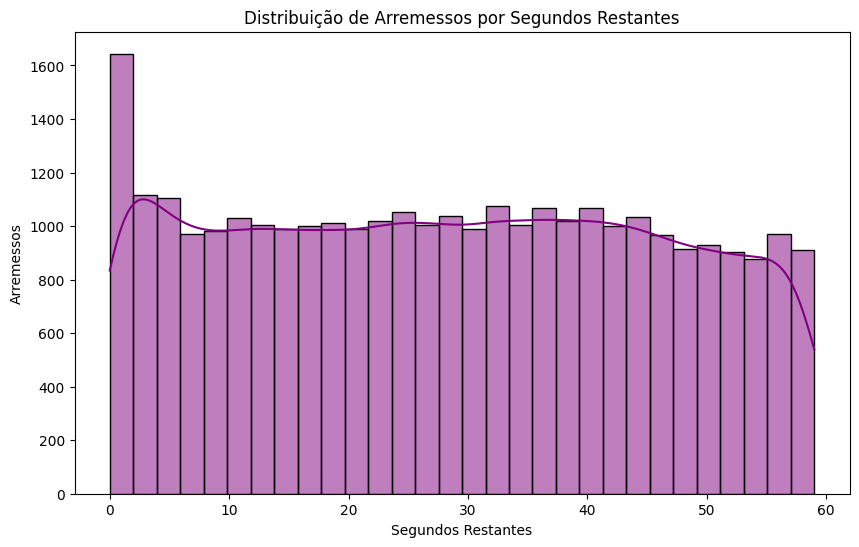

In [19]:

plt.figure(figsize=(10, 6))
sns.histplot(x=df['seconds_remaining'], bins=30, kde=True, color="Purple")
plt.xlabel('Segundos Restantes')
plt.ylabel('Arremessos')
plt.title('Distribuição de Arremessos por Segundos Restantes')


In [20]:
df['seconds_remaining'].describe()

count    30697.000000
mean        28.365085
std         17.478949
min          0.000000
25%         13.000000
50%         28.000000
75%         43.000000
max         59.000000
Name: seconds_remaining, dtype: float64

A análise da distribuição de arremessos em relação aos segundos restantes fornece informações sobre a tomada de decisão de Kobe Bryant em momentos críticos do jogo. O gráfico mostra como a contagem de arremessos varia à medida que o tempo diminui. Essas informações podem ser úteis para entender a estratégia de Kobe em situações de tempo limitado durante as partidas.

****
**10. QUAL É A DISTRIBUIÇÃO DOS ARREMESSOS POR TEMPORADA?**

 Ao analisar a distribuição de arremessos por temporada, podemos identificar se Kobe teve variações em sua participação ao longo de diferentes temporadas de sua carreira.

Text(0.5, 1.0, 'Distribuição de Arremessos por Temporada')

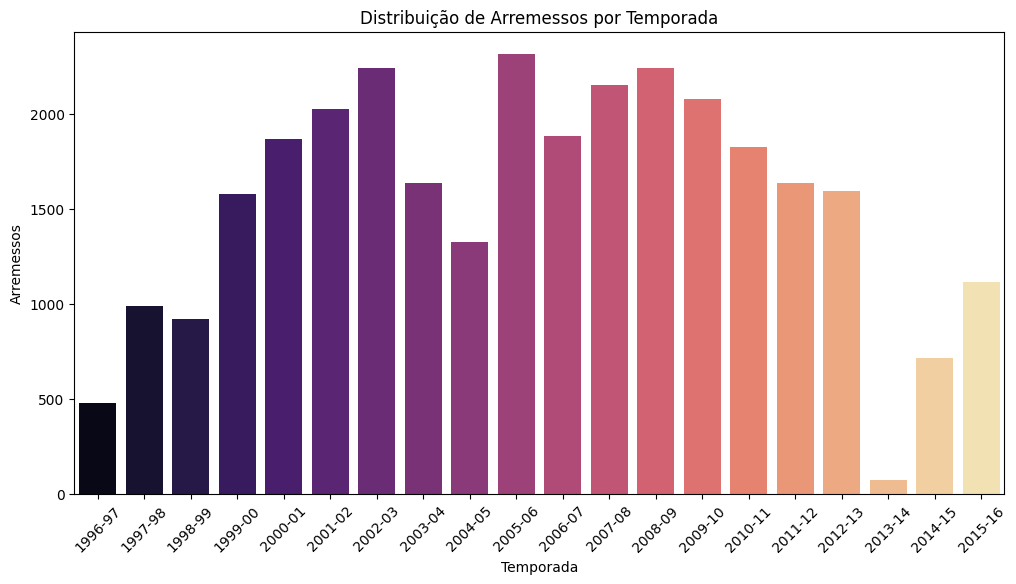

In [21]:

contagemTemporadas = df['season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=contagemTemporadas.index, y=contagemTemporadas.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel('Temporada')
plt.ylabel('Arremessos')
plt.title('Distribuição de Arremessos por Temporada')


A análise da distribuição de arremessos por temporada revela como a participação de Kobe Bryant variou ao longo de sua carreira na NBA. Essa informação é relevante para identificar se houve variações em sua desempenho no jogo em diferentes épocas e pode ajudar a compreender sua evolução como jogador. Também é interessante notar a diferença dos arremessos na temporada de 2013-14 onde kobe sofreu um grave lesão e jogou poucos jogos.

****
**11. QUAL É AS 10 TIPOS DE AÇÕES MAIS ESPECÍFICAS UTILIZADAS PELO KOBE?**

A análise da distribuição dos tipos de ações mais específicas pode fornecer insights sobre as jogadas ou ações que Kobe mais frequentemente executava durante seus arremessos.

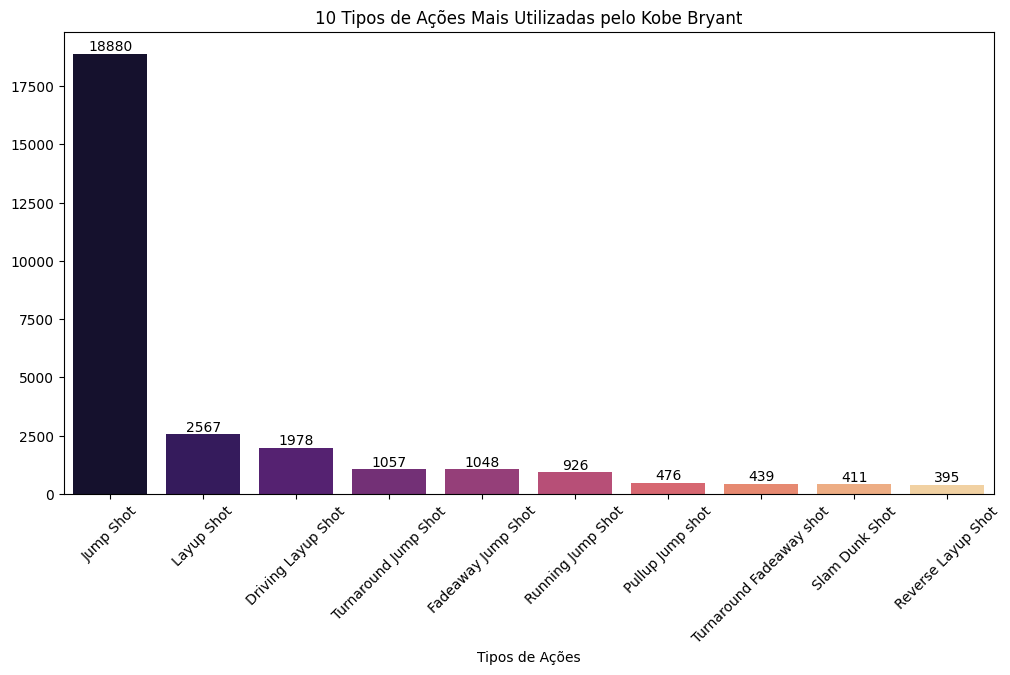

In [22]:

tiposDeAcao = df['action_type'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=tiposDeAcao.index, y=tiposDeAcao.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel('Tipos de Ações')
plt.title('10 Tipos de Ações Mais Utilizadas pelo Kobe Bryant')


for index, value in enumerate(tiposDeAcao):
    plt.text(index, value, str(value), ha='center', va='bottom')

A análise da distribuição dos tipos de ações mais específicas destaca as jogadas ou ações que Kobe frequentemente realizava durante seus arremessos. Podemos observar sua grande preferência por jump shots de diversas formas, mostrando um vasto repertório.

****
**12. QUAL É A DISTRIBUIÇÃO DE TIPOS DE AÇÕES SIMPLES DE FINALIZAÇÃO?**

A análise da distribuição dos tipos de ações mais simples pode fornecer insights sobre as jogadas ou ações que Kobe mais frequentemente executava durante seus arremessos.

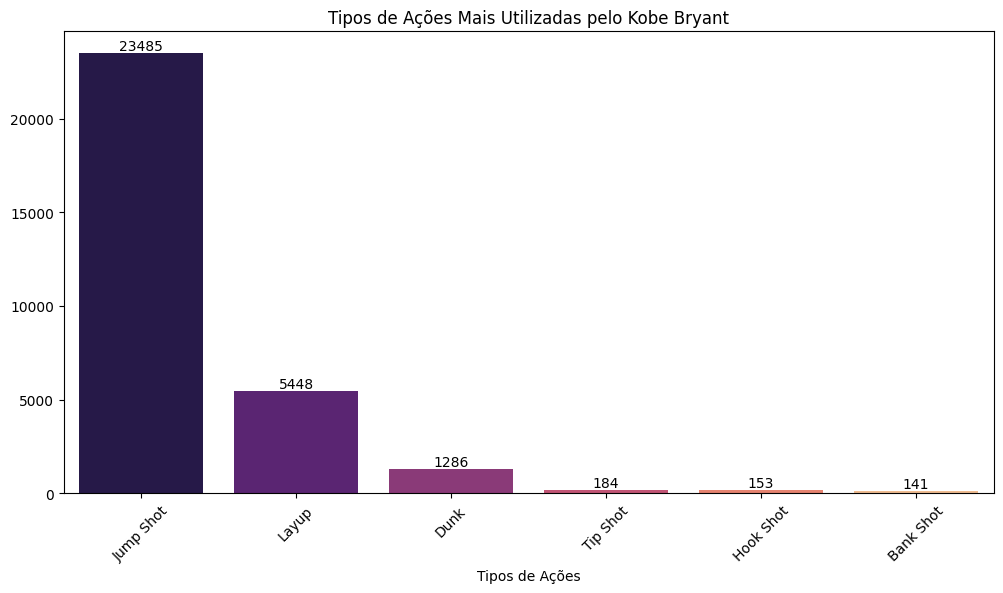

In [23]:
tiposDeArremessoCombinado = df['combined_shot_type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=tiposDeArremessoCombinado.index, y=tiposDeArremessoCombinado.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel('Tipos de Ações')
plt.title('Tipos de Ações Mais Utilizadas pelo Kobe Bryant')

for index, value in enumerate(tiposDeArremessoCombinado):
    plt.text(index, value, str(value), ha='center', va='bottom')

A análise da distribuição dos tipos de ações simples destaca as ações básicas que Kobe frequentemente realizava durante seus arremessos.

****
**13. QUAL A QUANTIDADE DE PARTIDAS JOGADAS PELO KOBE DURANTE SUA CARREIRA?**

In [24]:

qtdJogos = df['game_id'].nunique()
print(f"Quantidade de jogos: {qtdJogos}")

Quantidade de jogos: 1559


Essa informação é importante para entender a extensão de sua carreira e a quantidade de dados disponíveis para análise.

****
**14. QUAL A DISTRIBUIÇÃO DOS ARREMESSOS NA QUADRA EM RELAÇÃO A COORDENADA X?**

A análise da distribuição de arremessos em relação à coordenada X na quadra pode fornecer informações sobre os locais específicos onde Kobe mais frequentemente realizava seus arremessos.


Text(0.5, 1.0, 'Distribuição de Arremessos por Coordenada X na Quadra')

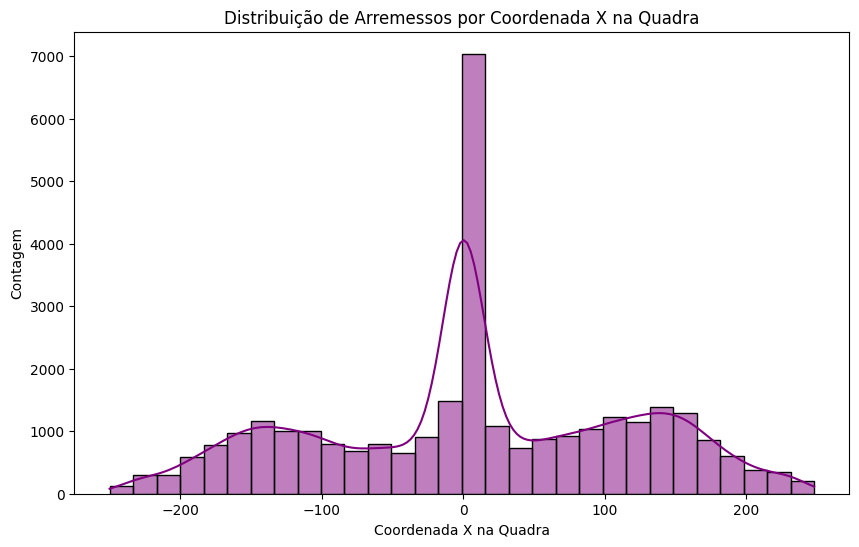

In [25]:

plt.figure(figsize=(10, 6))
sns.histplot(x=df['loc_x'], bins=30, kde=True, color='purple')
plt.xlabel('Coordenada X na Quadra')
plt.ylabel('Contagem')
plt.title('Distribuição de Arremessos por Coordenada X na Quadra')


A análise da distribuição de arremessos em relação à coordenada X na quadra ajuda a identificar os locais específicos onde Kobe Bryant realizava seus arremessos com mais frequência. Isso pode ser útil para entender suas preferências de posicionamento na quadra e as áreas onde ele era mais eficaz em fazer arremessos.

****
**15. QUAL A DISTRIBUIÇÃO DOS ARREMESSOS NA QUADRA EM RELAÇÃO A COORDENADA Y?**

A análise da distribuição de arremessos em relação à coordenada Y na quadra pode fornecer informações sobre os locais específicos onde Kobe mais frequentemente realizava seus arremessos.


Text(0.5, 1.0, 'Distribuição de Arremessos por Coordenada Y na Quadra')

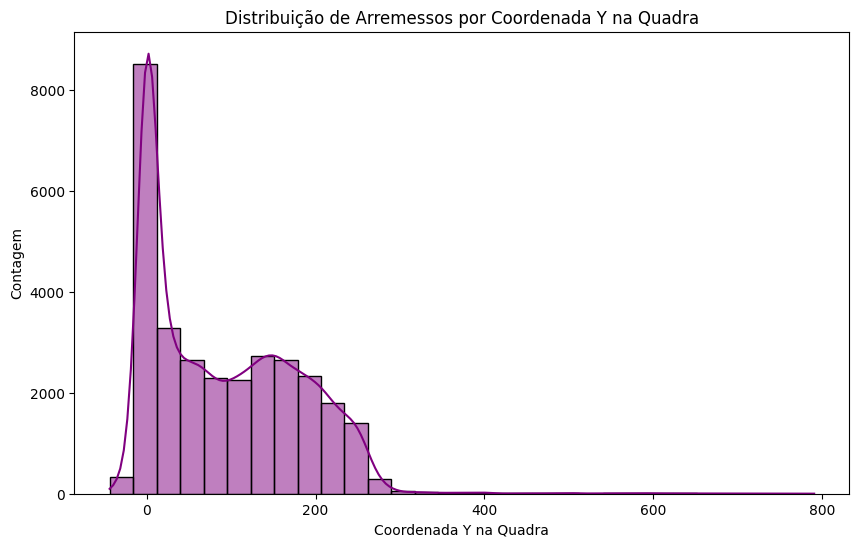

In [26]:

plt.figure(figsize=(10, 6))
sns.histplot(x=df['loc_y'], bins=30, kde=True, color='purple')
plt.xlabel('Coordenada Y na Quadra')
plt.ylabel('Contagem')
plt.title('Distribuição de Arremessos por Coordenada Y na Quadra')

A análise da distribuição de arremessos em relação à coordenada Y na quadra ajuda a identificar os locais específicos onde Kobe Bryant realizava seus arremessos com mais frequência. Isso pode ser útil para entender suas preferências de posicionamento na quadra e as áreas onde ele era mais eficaz em fazer arremessos. Também podemos analisar juntamente pra obter informações sobre o arremesso em um lugar específico da quadra.

****
**16. QUAIS SÃO TODOS OS TIME QUE O KOBE ENFRENTOU A NBA?**

A lista de todos os times que Kobe Bryant enfrentou no conjunto de dados permite identificar quais equipes ele jogou ao longo de sua carreira.

In [27]:


df['opponent'].unique()

array(['POR', 'UTA', 'VAN', 'LAC', 'HOU', 'SAS', 'DEN', 'SAC', 'CHI',
       'GSW', 'MIN', 'IND', 'SEA', 'DAL', 'PHI', 'DET', 'MIL', 'TOR',
       'MIA', 'PHX', 'CLE', 'NJN', 'NYK', 'CHA', 'WAS', 'ORL', 'ATL',
       'MEM', 'BOS', 'NOH', 'NOP', 'OKC', 'BKN'], dtype=object)

Isso é relevante para entender a diversidade de oponentes que ele enfrentou ao longo de sua carreira na NBA.







****
**17. QUAL É DISTRIBUIÇÃO DOS ARREMESSOS POR MINUTOS FALTANDO?**

A análise da distribuição de arremessos em relação aos minutos restantes pode fornecer informações sobre os momentos específicos durante a partida em que Kobe mais frequentemente realizava seus arremessos.

Text(0.5, 1.0, 'Distribuição de Arremessos por Minutos Restantes')

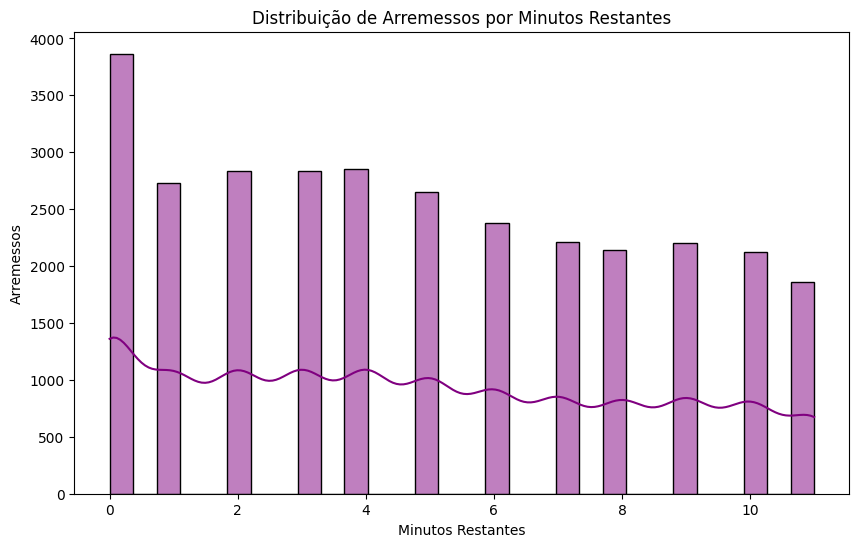

In [28]:

plt.figure(figsize=(10, 6))
sns.histplot(x=df['minutes_remaining'], bins=30, kde=True, color='purple')
plt.xlabel('Minutos Restantes')
plt.ylabel('Arremessos')
plt.title('Distribuição de Arremessos por Minutos Restantes')

In [29]:
df['minutes_remaining'].describe()

count    30697.000000
mean         4.885624
std          3.449897
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: minutes_remaining, dtype: float64

A análise da distribuição de arremessos em relação aos minutos restantes na partida ajuda a identificar os momentos específicos durante o jogo em que Kobe Bryant mais frequentemente realizava seus arremessos.

****
**18. ANALISAR A DISTÂNCIA DOS ARREMESSOS**

A análise da distância dos arremessos permite obter informações sobre as distâncias médias em que Kobe costumava realizar seus arremessos.

In [30]:


media_distancia = df['shot_distance'].mean()
mediana_distancia = df['shot_distance'].median()
desvio_padrao_distancia = df['shot_distance'].std()
skew = df['shot_distance'].skew()
kurtosis = df['shot_distance'].kurtosis()


print(f'Média de Distância dos Arremessos: {media_distancia:.2f}')
print(f'Mediana de Distância dos Arremessos: {mediana_distancia:.2f}')
print(f'Desvio Padrão de Distância dos Arremessos: {desvio_padrao_distancia:.2f}')
print(f"Assimetria: {skew}")
print(f"Curtose: {kurtosis}")


Média de Distância dos Arremessos: 4.10
Mediana de Distância dos Arremessos: 4.57
Desvio Padrão de Distância dos Arremessos: 2.86
Assimetria: 0.1054630461037348
Curtose: 0.0445583576265145


A análise da distância dos arremessos fornece informações sobre as distâncias típicas em que Kobe Bryant costumava realizar seus arremessos. A média, mediana e desvio padrão ajudam a entender a distribuição das distâncias e a variabilidade em seus arremessos.

****
**19. QUAL FOI A MAIOR QUANTIDADE DE ARREMESSOS TENTADOS DO KOBE EM UM JOGO?**

Identificar o jogo em que Kobe tentou a maior quantidade de arremessos permite entender a o máximo de tentativas que o kobe conseguiu em um jogo.

In [31]:


jogo_com_mais_arremessos = df['game_id'].value_counts().nlargest(10)
jogo_com_mais_arremessos


21501228    50
20200069    47
20500591    46
20600431    45
20700553    44
20601081    44
21200398    41
20500480    41
20200743    41
20200127    40
Name: game_id, dtype: int64

A identificação do jogo em que Kobe Bryant tentou a maior quantidade de arremessos é relevante para entender o jogo de maior atividade ofensiva em sua carreira.

**20. QUAL FOI A MAIOR QUANTIDADE DE ARREMESSOS DO KOBE EM UMA TEMPORADA?**

Identificar a temporada em que Kobe tentou a maior quantidade de arremessos permite entender o período de sua carreira em que ele teve um maior volume de arremessos


Text(0.5, 1.0, 'Temporadas com Mais Arremessos Tentados')

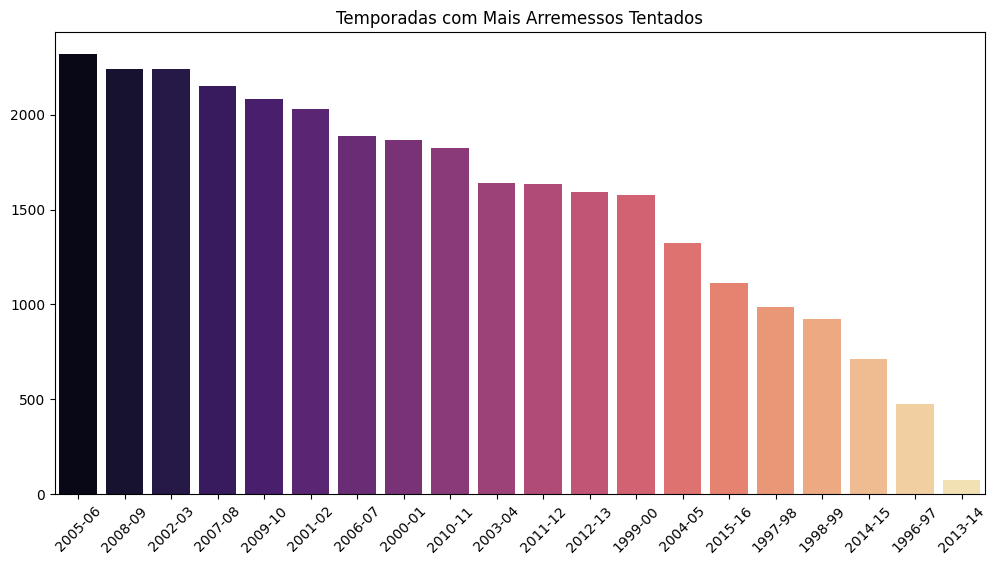

In [32]:
temporada_com_mais_arremessos = df['season'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=temporada_com_mais_arremessos.index, y=temporada_com_mais_arremessos.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel('')
plt.title('Temporadas com Mais Arremessos Tentados')

A identificação da temporada em que Kobe Bryant tentou a maior quantidade de arremessos é relevante para entender os momentos de maior atividade ofensiva em sua carreira. Isso pode indicar uma temporada particularmente destacada em termos de volume de arremessos. Olhando o gráfico na ordem decrescente conseguimos ter uma visão melhor de quais temporadas de sua carreira o Kobe mais tentou arremessos.

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [33]:
# BASE DE DADOS APENAS COM OS VALORES QUE TEM SE O ARREMESSO FOI BEM OU MAL SUCEDIDO
dfSemNull = df.dropna(subset=['shot_made_flag'])

****
**1. Como varia a distância dos arremessos em diferentes zonas da quadra no conjunto de dados de Kobe Bryant?**

A análise da distância dos arremessos por zona da quadra permite observar se certas zonas da quadra têm arremessos mais curtos ou mais longos.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Right Side(R)'),
  Text(1, 0, 'Left Side(L)'),
  Text(2, 0, 'Left Side Center(LC)'),
  Text(3, 0, 'Right Side Center(RC)'),
  Text(4, 0, 'Center(C)'),
  Text(5, 0, 'Back Court(BC)')])

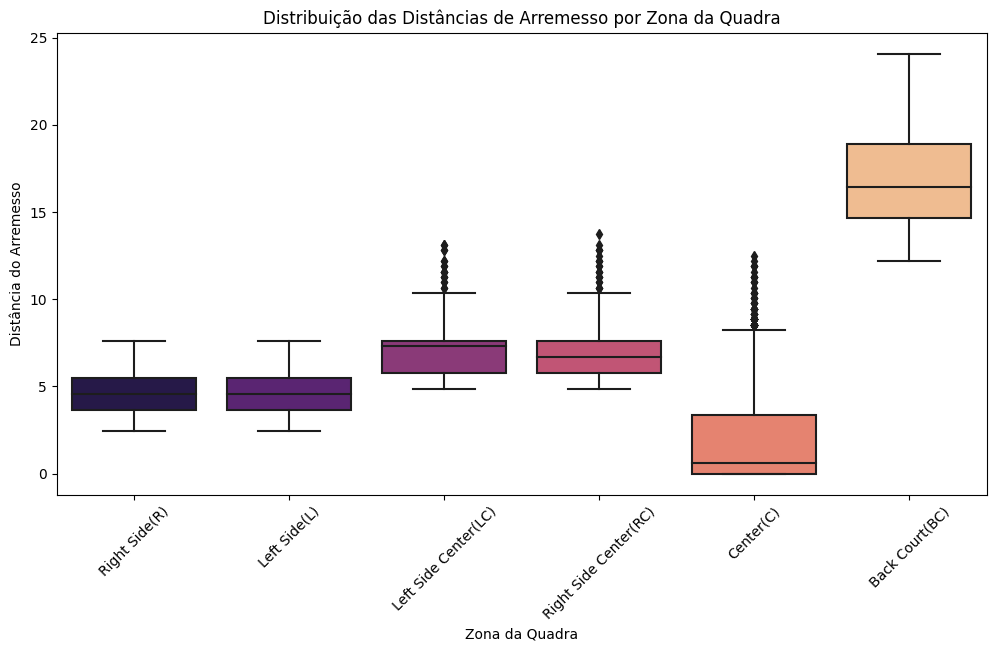

In [34]:


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='shot_zone_area', y='shot_distance', palette='magma')
plt.xlabel('Zona da Quadra')
plt.ylabel('Distância do Arremesso')
plt.title('Distribuição das Distâncias de Arremesso por Zona da Quadra')
plt.xticks(rotation=45)



A análise da distância dos arremessos por zona da quadra ajuda a identificar se existem padrões relacionados à distância dos arremessos em áreas específicas da quadra. O gráfico de caixa fornece informações sobre a dispersão das distâncias, destacando possíveis diferenças entre as zonas.

****
**2. QUAIS TIPOS DE ARREMESSOS O KOBE PREFERIA EM DIFERENTES ÁREAS DA QUADRA?**

A análise da distribuição de tipos de arremessos (2 pontos ou 3 pontos) por zona da quadra pode revelar se Kobe tinha preferência por tipos específicos de arremessos em diferentes áreas do jogo.

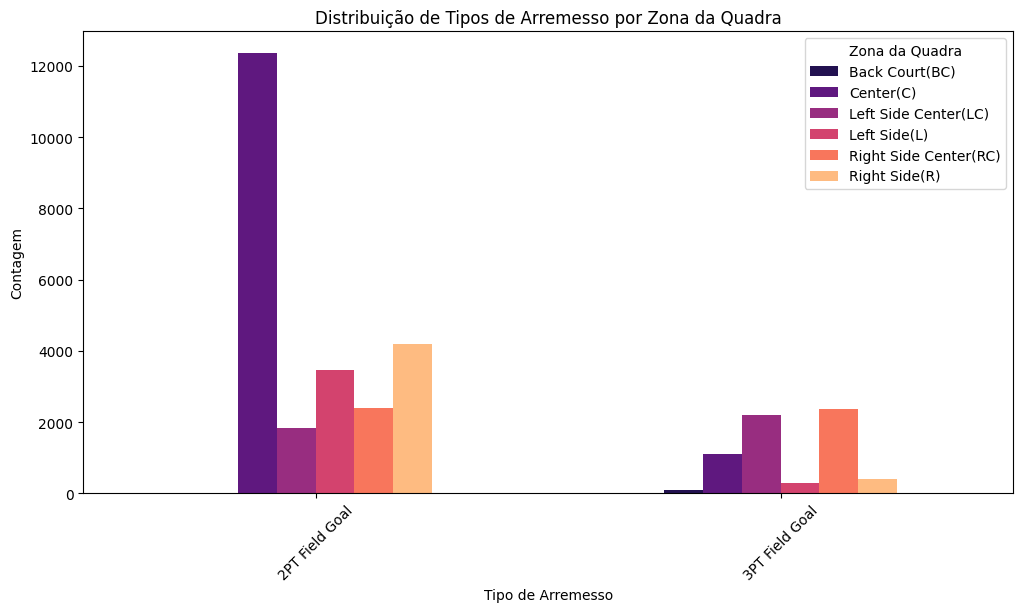

In [35]:


tabelaZonaTipoArremesso = pd.crosstab(df['shot_type'], df['shot_zone_area'])

tabelaZonaTipoArremesso.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Tipo de Arremesso')
plt.ylabel('Contagem')
plt.title('Distribuição de Tipos de Arremesso por Zona da Quadra')
plt.xticks(rotation=45)
plt.legend(title='Zona da Quadra')


O gráfico de barras empilhadas mostra a distribuição de tipos de arremessos (2 pontos ou 3 pontos) em diferentes áreas da quadra. Ajuda a identificar se Kobe Bryant tinha uma preferência por tipos específicos de arremessos em áreas distintas do jogo.

****
**3. QUAL É A TAXA DE ACERTO DOS ARREMESSOS POR DISTÂNCIA MÉDIA DA QUADRA?**

A análise da taxa de acerto dos arremessos por faixa de distância da quadra pode revelar em qual faixa de distância Kobe era mais eficiente em converter arremessos.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2,4 - 4,9m'),
  Text(1, 0, '4,9 - 7,3 m'),
  Text(2, 0, 'Antes do meio'),
  Text(3, 0, 'Mais que 7,3 m'),
  Text(4, 0, 'Menos que 2,4 m')])

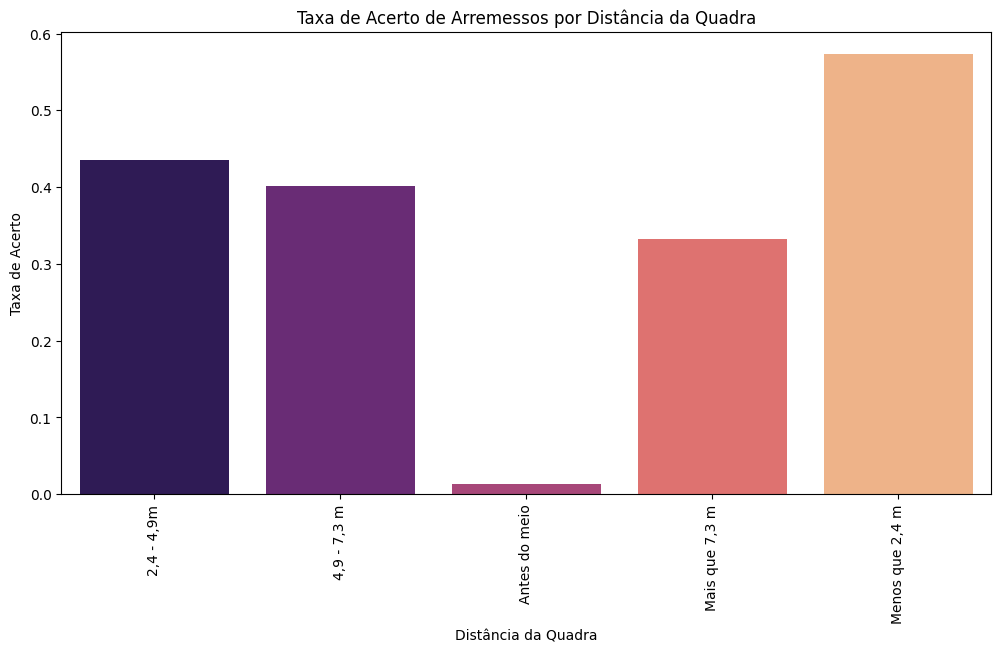

In [36]:

eficaciaPorDistancia = dfSemNull.groupby(['shot_zone_range', 'shot_made_flag']).size().unstack()

eficaciaPorDistancia['Taxa de Acerto'] = eficaciaPorDistancia[1] / (eficaciaPorDistancia[0] + eficaciaPorDistancia[1])

plt.figure(figsize=(12, 6))
sns.barplot(x=eficaciaPorDistancia.index, y=eficaciaPorDistancia['Taxa de Acerto'], hue_order=[0, 1], palette='magma')
plt.xlabel('Distância da Quadra')
plt.ylabel('Taxa de Acerto')
plt.title('Taxa de Acerto de Arremessos por Distância da Quadra')
plt.xticks(rotation=90)



A análise da taxa de acerto de arremessos por distância da quadra permite identificar em qual faixa de distância Kobe Bryant era mais eficiente em converter arremessos. Isso é importante para entender sua habilidade em diferentes distâncias da cesta e pode ajudar a identificar suas áreas de maior sucesso no arremesso.

****
**4. QUAL É A TAXA DE ACERTO DOS ARREMESSOS POR PERÍODO?**

A análise da taxa de acerto dos arremessos por período de jogo pode revelar em qual período Kobe era mais eficiente em converter arremessos.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

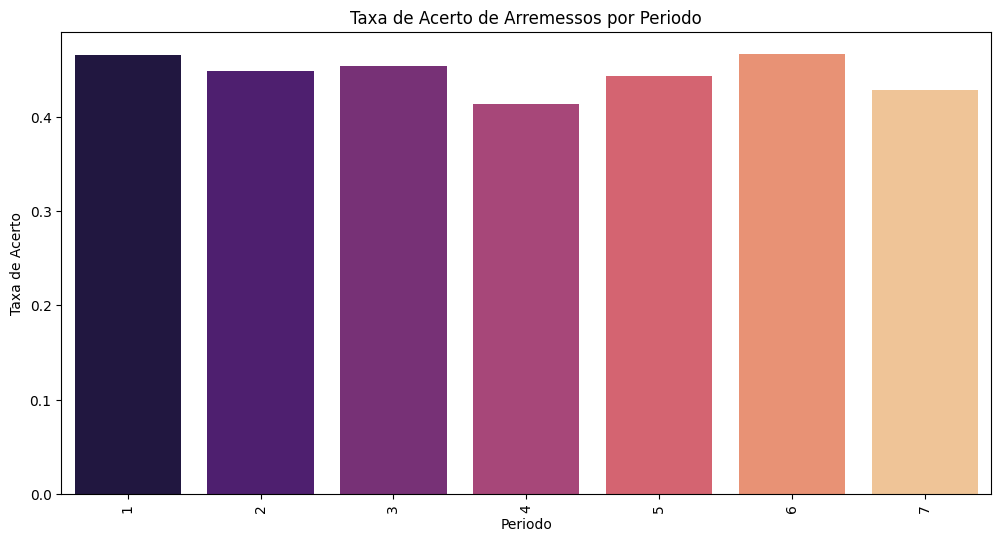

In [37]:

eficaciaPorPeriodo = dfSemNull.groupby(['period', 'shot_made_flag']).size().unstack()

eficaciaPorPeriodo['Taxa de Acerto'] = eficaciaPorPeriodo[1] / (eficaciaPorPeriodo[0] + eficaciaPorPeriodo[1])

plt.figure(figsize=(12, 6))
sns.barplot(x=eficaciaPorPeriodo.index, y=eficaciaPorPeriodo['Taxa de Acerto'], hue_order=[0, 1], palette='magma')
plt.xlabel('Periodo')
plt.ylabel('Taxa de Acerto')
plt.title('Taxa de Acerto de Arremessos por Periodo')
plt.xticks(rotation=90)


A análise permite identificar em qual período Kobe Bryant era mais eficiente em converter arremessos. Isso é importante para entender sua performance ao longo de diferentes estágios da partida e pode ajudar a identificar os momentos em que ele era mais eficaz no arremesso.

****
**5. QUAL A TAXA DE ACERTO DOS ARREMESSOS POR ZONA BÁSICA DA QUADRA?**

 A análise da taxa de acerto dos arremessos por zona básica da quadra pode nos mostrar em qual zona Kobe era mais eficiente em converter arremessos.

(0.0, 1.0)

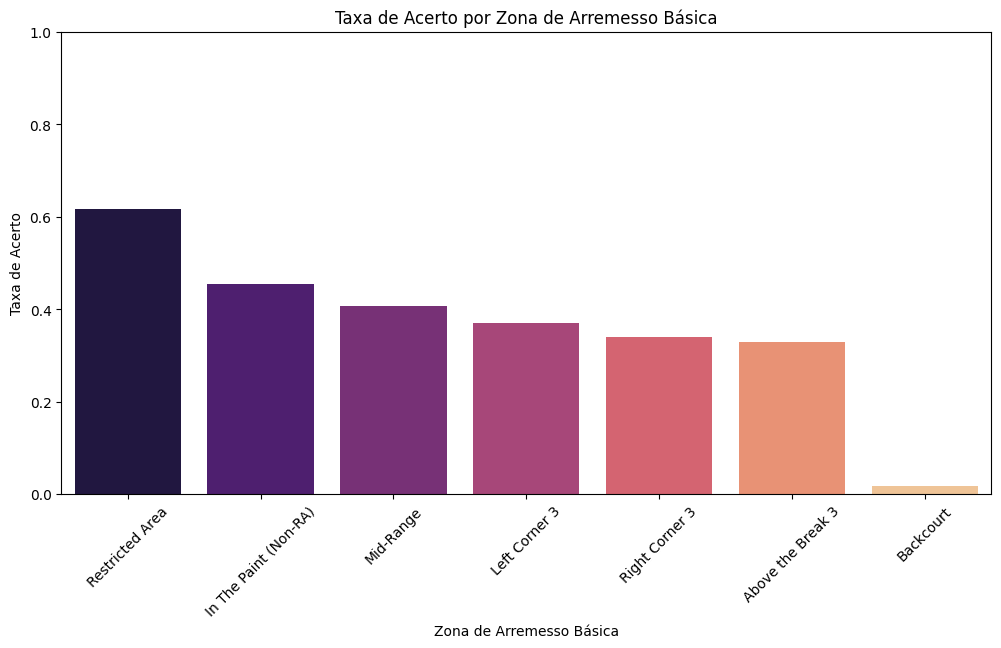

In [38]:

taxa_acerto_por_zona = dfSemNull.groupby('shot_zone_basic')['shot_made_flag'].mean().reset_index()

taxa_acerto_por_zona = taxa_acerto_por_zona.sort_values(by='shot_made_flag', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=taxa_acerto_por_zona['shot_zone_basic'], y=taxa_acerto_por_zona['shot_made_flag'], palette='magma')
plt.xlabel('Zona de Arremesso Básica')
plt.ylabel('Taxa de Acerto')
plt.title('Taxa de Acerto por Zona de Arremesso Básica')
plt.xticks(rotation=45)
plt.ylim(0, 1)


Essa análise ajuda a identificar em qual zona Kobe Bryant era mais eficiente em converter arremessos. Isso é importante para entender sua habilidade de arremesso em diferentes áreas da quadra e pode destacar as zonas onde ele era mais preciso.

****
**6. QUAL A QUANTIDADE DE ARREMESSOS POR PERÍODO E POR TIPO E ARREMESSO?**

A análise da distribuição de tipos de arremessos (2 pontos ou 3 pontos) por período de jogo pode revelar se Kobe preferia tipos específicos de arremessos em diferentes momentos do jogo.

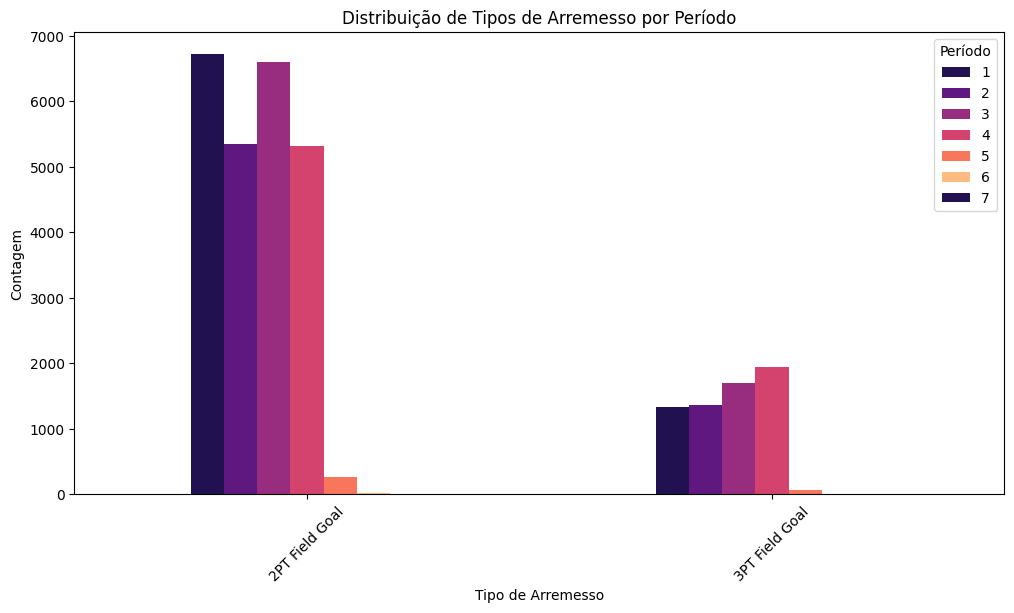

In [39]:

sns.set_palette("magma")
tipo_arremesso_periodo = pd.crosstab(df['shot_type'], df['period'])

tipo_arremesso_periodo.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Tipo de Arremesso')
plt.ylabel('Contagem')
plt.title('Distribuição de Tipos de Arremesso por Período')
plt.xticks(rotation=45)
plt.legend(title='Período')


A análise da distribuição de tipos de arremessos por período de jogo permite identificar se Kobe Bryant tinha preferência por tipos específicos de arremessos em diferentes momentos do jogo. Quando ele costumava forçar mais arremessos de três ou preferia a infiltração.

****
**7. QUAL É A TAXA DE ACERTO DOS ARREMESSOS POR TIPO DE FINALIZAÇÕES BÁSICAS?**

A análise da taxa de acerto dos arremessos por tipo de finalizações básicas pode revelar em quais tipos Kobe se saía melhor.

(0.0, 1.0)

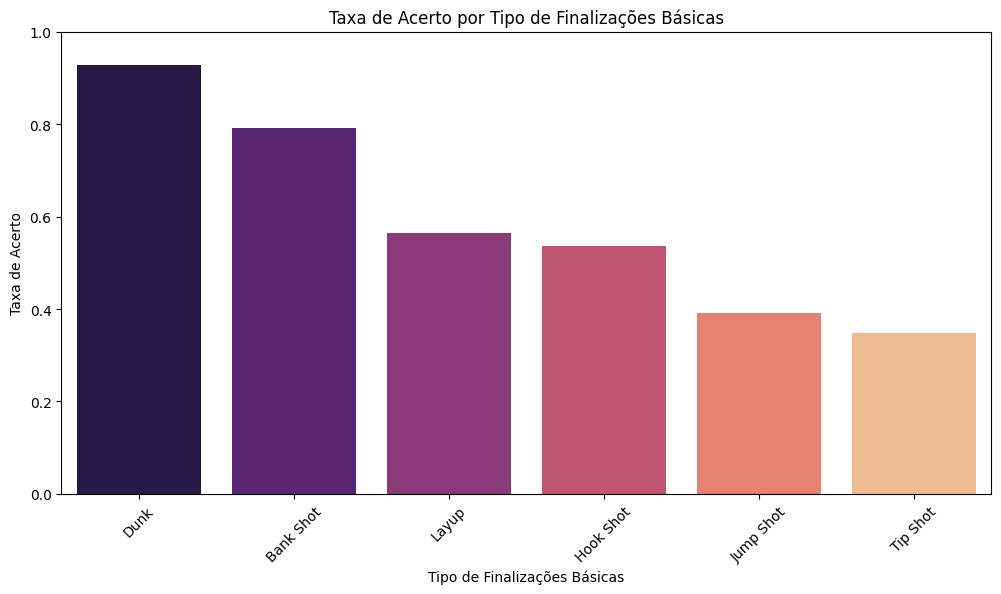

In [40]:

eficaciaAcaoSimples = dfSemNull.groupby('combined_shot_type')['shot_made_flag'].mean().reset_index()

eficaciaAcaoSimples = eficaciaAcaoSimples.sort_values(by='shot_made_flag', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=eficaciaAcaoSimples['combined_shot_type'], y=eficaciaAcaoSimples['shot_made_flag'], palette='magma')
plt.xlabel('Tipo de Finalizações Básicas')
plt.ylabel('Taxa de Acerto')
plt.title('Taxa de Acerto por Tipo de Finalizações Básicas')
plt.xticks(rotation=45)
plt.ylim(0, 1)



A análise da taxa de acerto de arremessos por tipo de finalizações básicas ajuda a identificar em quais tipos de finalizações Kobe Bryant tinha uma taxa de acerto mais alta. Isso é importante para entender sua eficácia em diferentes situações de finalização e pode destacar os tipos de arremessos em que ele era mais preciso.

****
**8. QUAL É A CORRELAÇÃO ENTRE A DISTÂNCIA DOS ARREMESSOS, MINUTOS RESTANTES E TAMBÉM O TIPO DE ARREMESSO?**

A análise da correlação entre a distância dos arremessos e os minutos restantes pode revelar se Kobe Bryant buscava forçar mais os arremessos nos momentos finais dos jogos ou se tentava infiltrar mais.

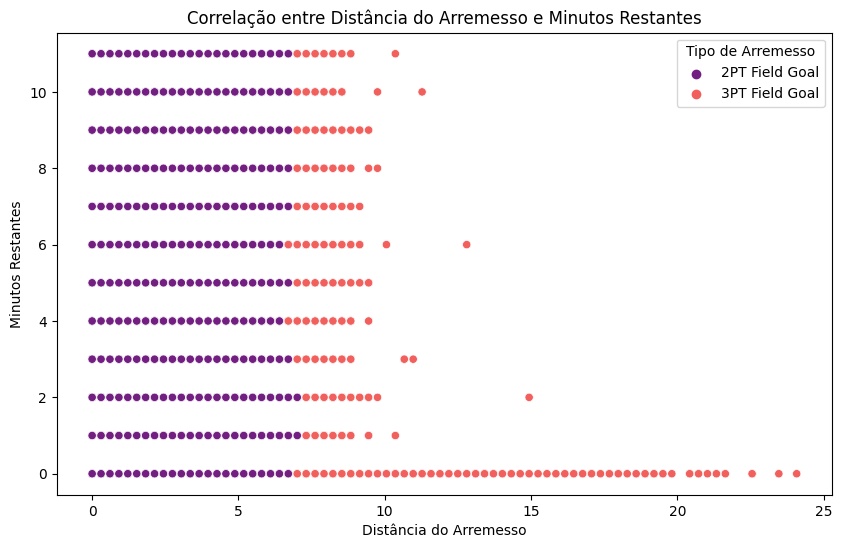

In [41]:

distancia_minutos_tipo_arremesso = df[['shot_distance', 'minutes_remaining', 'shot_type']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=distancia_minutos_tipo_arremesso['shot_distance'], y=distancia_minutos_tipo_arremesso['minutes_remaining'],
                hue=distancia_minutos_tipo_arremesso['shot_type'], palette='magma')

plt.xlabel('Distância do Arremesso')
plt.ylabel('Minutos Restantes')
plt.title('Correlação entre Distância do Arremesso e Minutos Restantes')
plt.legend(title='Tipo de Arremesso')

A análise da correlação entre a distância dos arremessos e os minutos restantes pode ajudar a identificar se Kobe Bryant tinha uma estratégia específica nos momentos finais dos jogos.

****
**9. QUAL A DISTRIBUIÇÃO DAS FINALIZAÇÕES BÁSICAS POR ZONA BÁSICA DA QUADRA?**

 A análise da distribuição dos tipos de finalizações básicas por zona básica da quadra pode revelar quais tipos são mais comuns em diferentes áreas da quadra

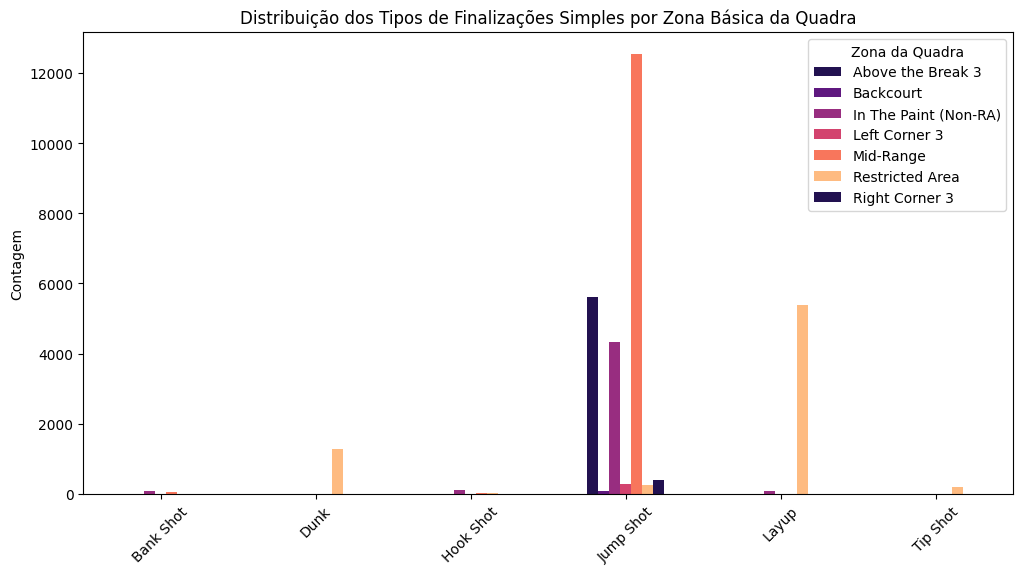

In [42]:

tabelaFinalizacoesSimples = pd.crosstab(df['combined_shot_type'], df['shot_zone_basic'])

tabelaFinalizacoesSimples.plot(kind='bar', figsize=(12, 6))
plt.xlabel('')
plt.ylabel('Contagem')
plt.title('Distribuição dos Tipos de Finalizações Simples por Zona Básica da Quadra')
plt.xticks(rotation=45)
plt.legend(title='Zona da Quadra')

A análise da distribuição dos tipos de finalizações básicas por zona básica da quadra ajuda a identificar quais tipos são mais comuns em diferentes áreas da quadra. Isso pode fornecer insights sobre as preferências de finalização de Kobe Bryant em diferentes situações de jogo e localizações na quadra.

****
**10. QUANTIDADE DE ARREMESSOS FEITOS E DESPERDIÇADOS NOS ÚLTIMOS 2 MINUTOS DO 4º QUARTO?**

A análise da distribuição de arremessos nos últimos 2 minutos do 4º quarto pode revelar como Kobe Bryant se saía nos momentos mais decisivos do jogo.

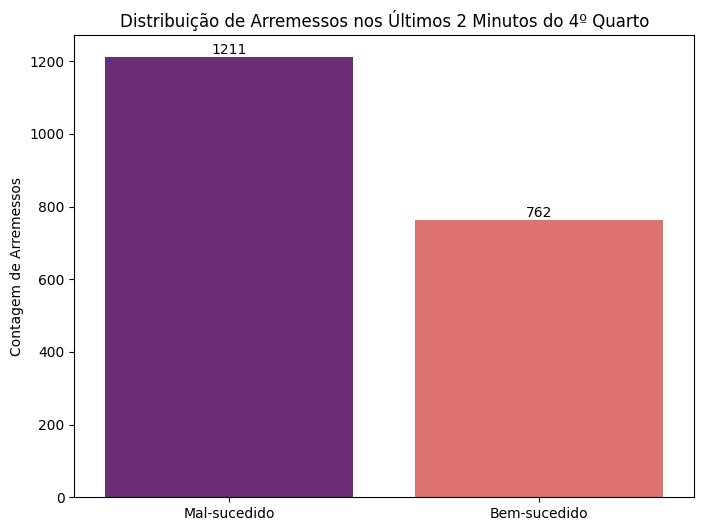

In [43]:

ultimo_quarto = dfSemNull[(dfSemNull['period'] == 4) & (dfSemNull['minutes_remaining'] <= 2)]

contagem_arremessos = ultimo_quarto['shot_made_flag'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_arremessos.index, y=contagem_arremessos.values, palette='magma')
plt.ylabel('Contagem de Arremessos')
plt.title('Distribuição de Arremessos nos Últimos 2 Minutos do 4º Quarto')
plt.xticks(ticks=[0, 1], labels=['Mal-sucedido', 'Bem-sucedido'])

for index, value in enumerate(contagem_arremessos):
    plt.text(index, value, str(value), ha='center', va='bottom')

A análise da distribuição de arremessos nos últimos 2 minutos do 4º quarto permite verificar como Kobe Bryant se saía nos momentos mais decisivos do jogo. Isso é importante para entender sua capacidade de desempenho sob pressão e sua eficácia em arremessos cruciais no final das partidas.

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

****
**1. A TAXA DE ACERTO DOS ARREMESSOS POR TIPO DE FINALIZAÇÕES BÁSICAS**
- A hipótese por trás dessa visualização é que a taxa de acerto dos arremessos pode variar dependendo do tipo de finalização básica que o Kobe Bryant usava durante a sua carreira na NBA.

**FINALIZAÇÕES BÁSICAS:**
- **JUMP SHOT:** Um tipo de arremesso em que o jogador salta no ar antes de lançar a bola, geralmente utilizado em arremessos de longa ou média distância;
- **BANK SHOT:** O arremesso bate na tabela antes de entrar
- **TIP SHOT:** O jogador usa os dedos para tocar ou empurrar suavemente a bola em direção à cesta, geralmente após um rebote ofensivo;
- **DUNK:** Uma enterrada, o jogador pula o suficiente pra conseguir colocar a bola direto dentro da cesta;
- **LAYUP:** Uma bandeija, finalização usada quando o jogador finaliza próxima a cesta;
- **HOOK SHOT:** Gancho, o arremesso executado com uma ação de gancho, em que o jogador dobra o braço e lança a bola com um movimento de arco.

(0.0, 1.0)

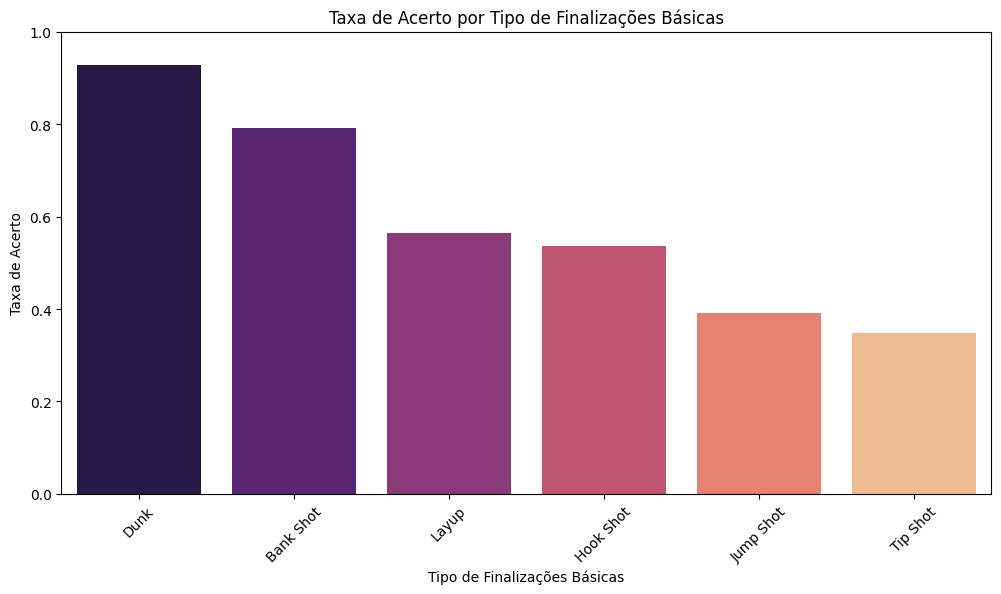

In [44]:
# === A TAXA DE ACERTO DOS ARREMESSOS POR TIPO DE FINALIZAÇÕES BÁSICAS ===

plt.figure(figsize=(12, 6))
sns.barplot(x=eficaciaAcaoSimples['combined_shot_type'], y=eficaciaAcaoSimples['shot_made_flag'], palette='magma')
plt.xlabel('Tipo de Finalizações Básicas')
plt.ylabel('Taxa de Acerto')
plt.title('Taxa de Acerto por Tipo de Finalizações Básicas')
plt.xticks(rotation=45)
plt.ylim(0, 1)

Esta visualização confirma que a habilidade de Kobe Bryant variava dependendo do tipo de finalização básica que ele estava executando. O famoso bank shot (arremessos em que a bola bate na tabela antes de entrar) do Kobe, dunks (enterradas) e layups (bandeija) eram suas finalizações mais eficazes, com taxas de acerto médias mais altas, enquanto outros tipos de finalizações básicas tinham taxas de acerto médias mais baixas. Isso ressalta a versatilidade de Kobe como jogador e sua capacidade de se adaptar a diferentes situações no jogo.


****
**2. TAXA DE ACERTO DOS ARREMESSOS POR ZONA BÁSICA DA QUADRA**
- A hipótese subjacente a esta visualização é que a taxa de acerto dos arremessos de Kobe Bryant pode variar dependendo da zona básica da quadra em que ele estava fazendo os arremessos.

**ZONA BÁSICA DA QUADRA:**
- **RESTRICTED AREA:** Também conhecida como "the paint" ou "the key," é a área pintada em forma de retângulo que fica diretamente em frente à cesta. Ela se estende desde a linha de lance livre até o aro;
- **IN THE PAINT:**  Este termo é usado de forma mais ampla para se referir à área dentro da "Restricted Area."
- **MID-RANGE:** Esta área refere-se à distância da cesta que está além da área pintada e da área restrita, mas ainda mais perto da cesta do que a linha de três pontos, geralmente ocorrem a partir de cerca de 4,5 a 7,2 metros da cesta;
- **LEFT CORNER 3:** Esta é uma área específica da quadra, no canto esquerdo, onde os jogadores podem tentar arremessos de três pontos;
- **RIGHT CORNER 3:** Esta é uma área específica da quadra, no canto direito, onde os jogadores podem tentar arremessos de três pontos;
- **ABOVE THE BREAK 3:**Essa é a área da quadra onde os jogadores costumam fazer arremessos de três pontos fora das áreas de canto;
- **BACK COURT:** A "back court" é a metade da quadra oposta à cesta que uma equipe está atacando.

(0.0, 1.0)

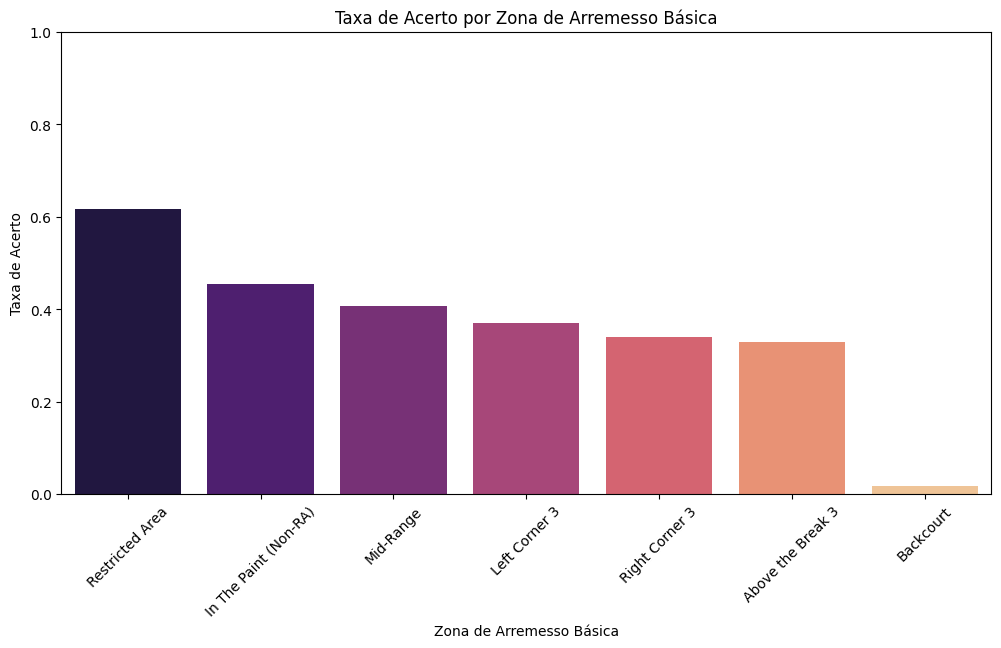

In [45]:
# === TAXA DE ACERTO POR ZONA BÁSICA DA QUADRA ===

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=taxa_acerto_por_zona['shot_zone_basic'], y=taxa_acerto_por_zona['shot_made_flag'], palette='magma')
plt.xlabel('Zona de Arremesso Básica')
plt.ylabel('Taxa de Acerto')
plt.title('Taxa de Acerto por Zona de Arremesso Básica')
plt.xticks(rotation=45)
plt.ylim(0, 1)



Essa análise revela as zonas básicas da quadra onde Kobe Bryant era mais eficiente em termos de taxa de acerto de arremessos. Ele se destacava especialmente nas áreas próximas à cesta, como a Restricted Area(Área Restrita) e In the Paint (Pintura), onde sua taxa de acerto era mais alta. Isso reflete sua habilidade em finalizar perto do aro.

Por outro lado, arremessos de longa distância a partir da linha dos três pontos sem ser o cantos da quadra tinham taxas de acerto mais baixas, indicando que esses eram arremessos mais desafiadores para Kobe.

****
**3. QUANTIDADE DE ARREMESSOS POR PERÍODO E POR TIPO DE ARREMESSO**

- A hipótese é que a escolha do tipo de arremesso por Kobe Bryant pode variar dependendo do período do jogo, refletindo diferentes estratégias ou abordagens em momentos distintos.



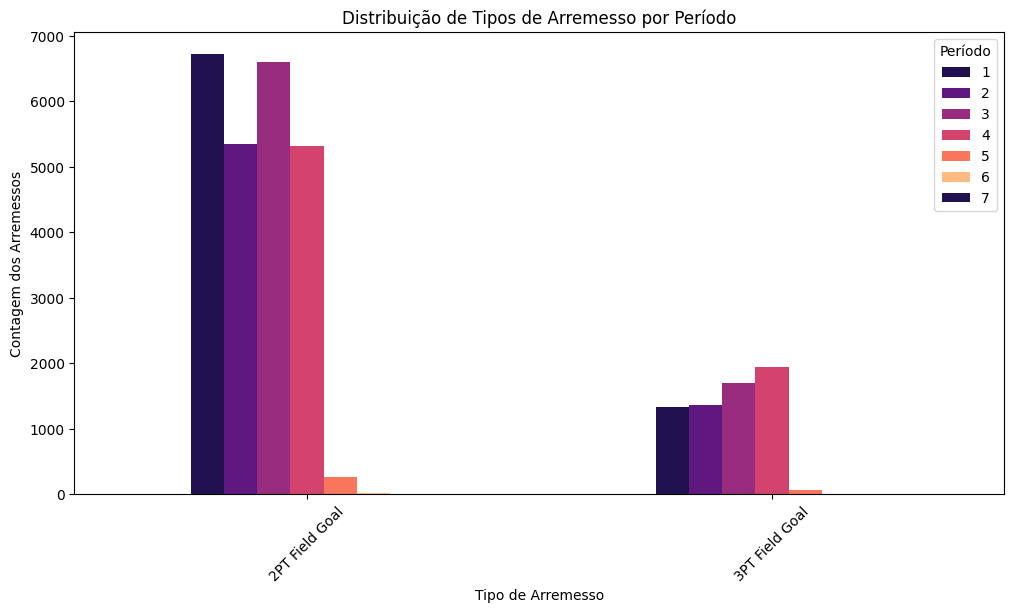

In [46]:
# === QUANTIDADE DE ARREMESSOS POR PERIODO E POR TIPO DE ARREMESSO ===

tipo_arremesso_periodo.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Tipo de Arremesso')
plt.ylabel('Contagem dos Arremessos')
plt.title('Distribuição de Tipos de Arremesso por Período')
plt.xticks(rotation=45)
plt.legend(title='Período')


Essa análise fornece insights sobre as preferências de arremesso de Kobe Bryant em diferentes momentos do jogo. Nos primeiros períodos, ele tende a optar por arremessos de dois pontos, mas no quarto período, há uma mudança notável em direção a arremessos de três pontos. Isso sugere que Kobe estava disposto a assumir riscos e tentar arremessos de longa distância no final dos jogos para buscar a vitória. Também um ponto interessante de se analisar é a grande diferença da quantidade de arremessos de 2 tentados do primeiro período pro segundo e também do terceiro pro quarto por que geralmente as estrelas dos times da NBA como é no caso do Kobe, tendem a jogar mais no primeiro período e começam o segundo descansando no banco, o mesmo equivale para o terceiro e o quarto período, no 3º período as estrelas voltam do intervalo mais descansados e geralmente jogam a maior parte do tempo e começam o último período no banco pra entreram com mais folêgo na parte decisiva do jogo com isso o número de arremessos no segundo e quarto período tendem a cair.

****
**4. QUAL É A CORRELAÇÃO ENTRE A DISTÂNCIA DOS ARREMESSOS, MINUTOS RESTANTES E TAMBÉM O TIPO DO ARREMESSSO?**

- Nesta análise, estamos investigando como a distância dos arremessos de Kobe Bryant se relaciona com a quantidade de tempo restante em um jogo de basquete. A ideia é entender se Kobe tinha uma estratégia específica nos momentos finais das partidas.

- **Distância dos Arremessos:** Estamos olhando para a distância entre Kobe e a cesta no momento em que ele tentou um arremesso. Isso nos diz se o arremesso foi de perto da cesta ou de longe.

- **Minutos Restantes:**  Aqui, estamos considerando quanto tempo ainda faltava no jogo quando Kobe tentou um arremesso. Isso nos ajuda a entender se o arremesso ocorreu no início, meio ou final do jogo.

- **Tipo de Arremesso:** Diferenciamos os tipos de arremessos, como arremessos de 2 pontos (mais perto da cesta) e arremessos de 3 pontos (mais distantes da cesta).

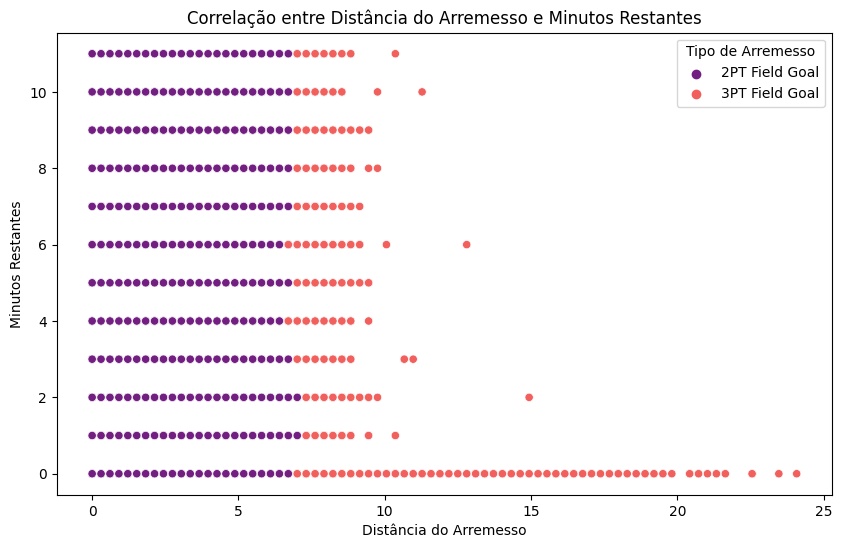

In [47]:
# === CORRELAÇÃO ENTRE A DISTÂNCIA DOS ARREMESSOS, MINUTOS RESTANTES E TAMBÉM O TIPO DE ARREMESSO ===

plt.figure(figsize=(10, 6))
sns.scatterplot(x=distancia_minutos_tipo_arremesso['shot_distance'], y=distancia_minutos_tipo_arremesso['minutes_remaining'],
                hue=distancia_minutos_tipo_arremesso['shot_type'], palette='magma')

plt.xlabel('Distância do Arremesso')
plt.ylabel('Minutos Restantes')
plt.title('Correlação entre Distância do Arremesso e Minutos Restantes')
plt.legend(title='Tipo de Arremesso')


Essa análise nos ajuda a entender se Kobe Bryant tinha uma estratégia específica em relação à distância dos arremessos nos momentos finais dos jogos de basquete. Isso é importante para compreender como ele abordava a tomada de decisão nos momentos cruciais das partidas. Podemos observar uma tendência de que Kobe tendia a tentar arremessos mais distantes (3 pontos) à medida que o tempo diminuía, isso pode indicar uma estratégia de tentar marcar pontos rapidamente nos momentos finais das partidas. Isso poderia sugerir que ele confiava em sua habilidade de arremesso de longa distância quando a pressão estava alta e também que a defesa do outro time estava muito compacta, portanto era mais complicado de conseguir chegar próximo a cesta.

****
**5. A TAXA DE ACERTO DOS ARREMESSOS POR DISTÂNCIA MÉDIA DA CESTA**

-  A ideia por trás dessa análise é descobrir em que faixa de distância da cesta Kobe era mais eficiente em acertar seus arremessos. Entender se ele tinha mais sucesso em arremessos próximos à cesta ou em tiros de longa distância.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2,4 - 4,9m'),
  Text(1, 0, '4,9 - 7,3 m'),
  Text(2, 0, 'Antes do meio'),
  Text(3, 0, 'Mais que 7,3 m'),
  Text(4, 0, 'Menos que 2,4 m')])

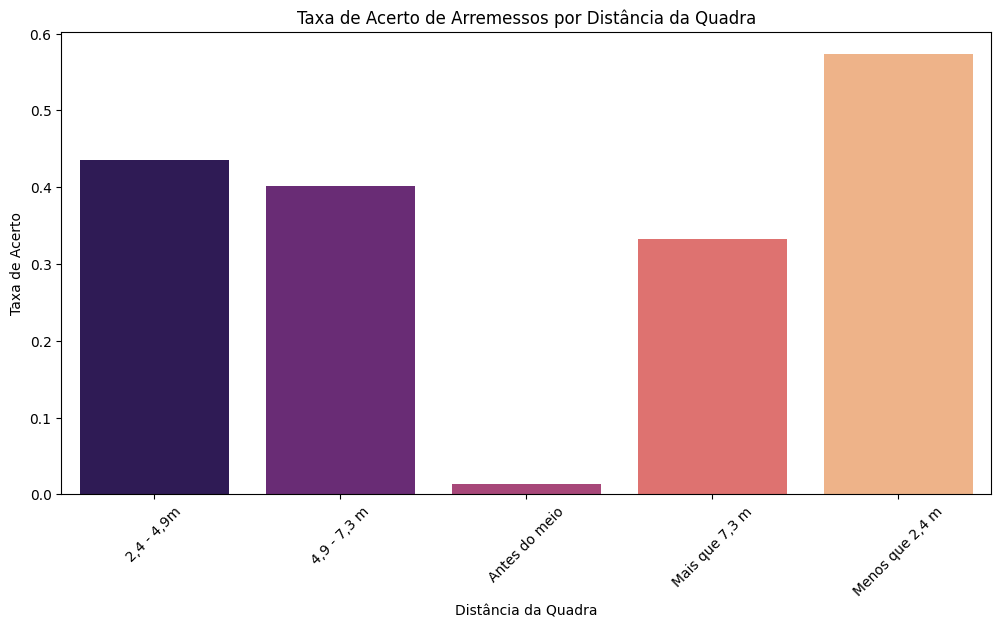

In [48]:
# ==+ TAXA DE ACERTO DOS ARREMESSOS POR DISTÂNCIA MÉDIA DA CESTA ===

plt.figure(figsize=(12, 6))
sns.barplot(x=eficaciaPorDistancia.index, y=eficaciaPorDistancia['Taxa de Acerto'], hue_order=[0, 1], palette='magma')
plt.xlabel('Distância da Quadra')
plt.ylabel('Taxa de Acerto')
plt.title('Taxa de Acerto de Arremessos por Distância da Quadra')
plt.xticks(rotation=45)


A análise da taxa de acerto de arremessos por distância da quadra nos ajuda a entender onde Kobe era mais eficaz em converter seus arremessos. Se ele tinha uma alta taxa de acerto em arremessos próximos à cesta, isso demonstra sua habilidade em jogadas de média distância ou até mesmo em tiros de longa distância. No gráfico onde cada barra no gráfico corresponde a uma faixa de distância específica e a altura das barras no gráfico representa a taxa de acerto de Kobe Bryant em cada faixa de distância, podemos observar sua alta eficiência em arremessos mais curta e média distância, nos arremessos maior distância a sua taxa de acerto tem um considerável queda, mas temos que levar em conta o contexto em que ele atuava, antes os jogadoresn não utilizavam tanto o arremesso de 3 pontos como hoje em dia, eles buscavam mais por tentivas mais próximas a cesta.

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

Durante a análise exploratória de dados deste conjunto de dados sobre os arremessos de Kobe Bryant, que continha por exemplo, o tipo de ação do arremesso, a distância, período, área, zona, temporada e data em que ele foi realizado, se ele foi bem sucedido ou mal sucedido, em qual jogo era, se era em playoffs ou temporada regular e mais algumas outras características, que a partir delas uma série de descobertas interessantes e insights foram obtidos. Ao longo desta análise, examinamos várias hipóteses e exploramos várias características do conjunto de dados, fornecendo uma visão mais profunda do desempenho de Kobe Bryant em sua carreira na NBA.

Conseguimos tirar diversas conclusões das análises univariadas principalmente sobre a distribuição dos arremessos do Kobe Bryant, uma das primeiras análises que conduzimos foi a distribuição dos arremessos em termos de distância, Descobrimos que a maioria dos arremessos de Kobe foi realizada a uma distância média de 3-4 metros da cesta. Essa observação sugere sua habilidade em criar e aproveitar oportunidades de arremessos de média distância. Esse era um dos traços distintivos do jogo de Kobe, que muitas vezes conseguia encontrar espaço e converter arremessos difíceis.

 Também analisamos a eficiência dos arremessos de Kobe. Ficou evidente que, ao longo de sua carreira, ele manteve uma boa eficiência, com uma taxa de acerto de 44%. Isso é particularmente notável quando se considera a quantidade massiva de arremessos que ele tentou durante sua carreira. Isso não apenas fala de sua habilidade, mas também de sua capacidade de tomar decisões inteligentes em quadra.

  Outra analise importante envolveu a comparação do desempenho do Kobe em jogos de Playoffs e na temporada regular, que supreendentemente, a quantidade de arremessos tentados não variou significativamente entre esses dois cenários, indicando que ele buscava o jogo mesmo sob pressão.
  
   Outro insight notável foi a preferência de Kobe por arremessar em duas zonas específicas da quadra: "Center(C)" no centro da quadra e "Right Side(R)" no lado direito da quadra. Essa preferência indicava sua facilidade em encontrar oportunidades favoráveis nessas áreas e sua capacidade de executar arremessos com precisão, constatamos uma variedade de ações em seu repertório e diversas outras análises como o jogo em que ele mais tentou arremessos na carreira, quantidade de partidas jogadas na carreira, todos os time que o Kobe enfrentou, etc.

Durante nossa análise da base de dados, não nos limitamos apenas a análises univariadas, mas também conduzimos análises multivariadas mais complexas que nos permitiram descobrir insights valiosos que não estava visivelmente presente na base sobre o desempenho do Kobe Bryant.

Uma das análises cruciais que realizamos investigou a correlação entre a distância dos arremessos e sua eficácia. Queríamos entender como a precisão de Kobe variava à medida que ele se afastava da cesta. O que encontramos foi revelador. Em média, Kobe manteve uma alta precisão em arremessos de média distância, mas sua eficácia diminuía consideravelmente em arremessos de longa distância. Isso destacou seus pontos fortes em diferentes faixas de distância e mostrou como ele adaptava seu jogo com base nisso.

Outra análise multivariada interessante explorou a relação entre a zona da quadra em que Kobe estava posicionado e a distância do arremesso. Queríamos entender como seu posicionamento estratégico se correlacionava com a escolha de arremessos. Descobrimos que ele frequentemente escolhia o centro da quadra para arremessos de curta distância, demonstrando sua habilidade em trabalhar dentro do garrafão. Nas laterais da quadra, arremessos de longa distância eram mais comuns. Essa análise revelou como Kobe adaptava seu posicionamento para otimizar suas chances de sucesso.

Além disso, exploramos as preferências de ações de Kobe em diferentes zonas da quadra. Queríamos saber se ele tinha táticas específicas em áreas específicas. Descobrimos que, no centro da quadra, Kobe tinha uma variedade de ações, incluindo arremessos de média distância e infiltrações. Por outro lado, nas laterais, ele tendia a focar mais em arremessos de três pontos e jogadas individuais. Essa análise nos deu uma visão mais profunda das estratégias táticas de Kobe em diferentes partes do campo.

Uma análise adicional que realizamos investigou a correlação entre a distância dos arremessos de Kobe e os minutos restantes no jogo. Queríamos entender se Kobe mudava seu estilo de jogo nos momentos finais das partidas. Descobrimos que, nos minutos finais, Kobe demonstrava uma tendência ligeiramente maior a arriscar arremessos de três pontos, as vezes para tentar pontuar rápido ou buscar uma virada no placar. Isso mostrou sua mentalidade competitiva e sua disposição de assumir a responsabilidade em momentos cruciais.

Essas análises multivariadas não apenas forneceram insights valiosos sobre o jogo de Kobe Bryant, mas também ilustraram a complexidade do basquete profissional. Elas nos ajudaram a entender como fatores como distância, localização na quadra e tempo influenciaram suas escolhas e desempenho.

As escolhas foram da variáveis paras as análises foram muito boas principalmente para as análises multivariadas de quem ja tem um pouco de entendimento sobre a base pode ajudar, para tirar insights mais valiosos, porém sentimos que análises poderiam ter sido um pouco mais profundas em alguns casos e também poderiamos variar um pouco mais nos tipos de gráficos escolhidos para deixar a análise melhor visualmente.
Contudo esta análise foi valiosa para aplicar os conhecimentos adquiridos e desenvolver uma mentalidade crítica em relação aos dados. A exploração detalhada deste conjunto de dados revelou informações significativas sobre a carreira de Kobe Bryant e demonstrou a importância da análise de dados no contexto esportivo e em outras áreas.






# Implementando Machine Learning



In [49]:
dfSemNull.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [50]:
dfSemNull = dfSemNull.drop(columns=['game_event_id', 'game_id', 'season', 'team_id',
                                    'team_name', 'team_name', 'game_date','matchup',
                                    'opponent', 'shot_id', 'lat', 'lon'])
dfSemNull.columns


Index(['action_type', 'combined_shot_type', 'loc_x', 'loc_y',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range'],
      dtype='object')

In [51]:
colunas_categoricas = ['action_type','combined_shot_type', 'shot_type', 'shot_zone_area',
                      'shot_zone_basic', 'shot_zone_range']

# TRANSFORMANDO COLUNAS CATEGÓRICAS EM NÚMERICAS
dfSemNull = pd.get_dummies(dfSemNull, columns=colunas_categoricas)

In [52]:
dfSemNull.head(3)

,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,...,shot_zone_basic_In The Paint (Non-RA),shot_zone_basic_Left Corner 3,shot_zone_basic_Mid-Range,shot_zone_basic_Restricted Area,shot_zone_basic_Right Corner 3,"shot_zone_range_2,4 - 4,9m","shot_zone_range_4,9 - 7,3 m",shot_zone_range_Antes do meio,"shot_zone_range_Mais que 7,3 m","shot_zone_range_Menos que 2,4 m"
1,-157,0,10,1,0,22,4.5720,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,-101,135,7,1,0,45,4.8768,1.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,138,175,6,1,0,52,6.7056,0.0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score


X = dfSemNull.drop(['shot_made_flag'], axis=1)  # COLUNAS
y = dfSemNull['shot_made_flag']  # ALVO

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# DIVIDIR EM TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RANDOM FOREST
rf_model = RandomForestClassifier(random_state=42)

# TREINAR MODELO
rf_model.fit(X_train, y_train)

# FAZER PREVISÕES NO CONJUNTO DE TESTE
y_pred_rf = rf_model.predict(X_test)

# MÉTRICAS DO MODELO
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f'Acurácia: {accuracy:.2f}%')
print(f'Precisão: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1-Score: {f1:.2f}%')



Acurácia: 0.64%
Precisão: 0.62%
Recall: 0.49%
F1-Score: 0.54%


In [55]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn = KNeighborsClassifier()

# TREINANDO O MODELO
knn.fit(X_train, y_train)

# PREVISÕES NO CONJUNTO DE TESTE
y_pred_knn = knn.predict(X_test)

# MÉTRICAS DO MODELO
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f'Acurácia: {accuracy_knn:.2f}%')
print(f'Precisão: {precision_knn:.2f}%')
print(f'Recall: {recall_knn:.2f}%')
print(f'F1-Score: {f1_knn:.2f}%')

Acurácia: 0.55%
Precisão: 0.49%
Recall: 0.44%
F1-Score: 0.46%


In [56]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

# TREINANDO O MODELO
dt.fit(X_train, y_train)

# PREVISÕES NO CONJUNTO DE TESTE
y_pred_dt = dt.predict(X_test)

# MÉTRICAS DO MODELO
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("\nAvaliação do modelo Árvore de Decisão:")
print(f'Acurácia: {accuracy_dt:.2f}%')
print(f'Precisão: {precision_dt:.2f}%')
print(f'Recall: {recall_dt:.2f}%')
print(f'F1-Score: {f1_dt:.2f}%')


Avaliação do modelo Árvore de Decisão:
Acurácia: 0.58%
Precisão: 0.52%
Recall: 0.53%
F1-Score: 0.52%


In [57]:
# CRIAR INSTANCIA DO SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

# OVERSAMPLING
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [58]:
# DIVIDIR NOVAMENTE EM TREINO E TESTE MAS COM A BASE BALANCEADA
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [59]:
# RANDOM FOREST
rf_model = RandomForestClassifier(random_state=42)

# TREINANDO MODELO
rf_model.fit(X_train, y_train)

# FAZER PREVISÕES NO CONJUNTO DE TESTE
y_pred_rf = rf_model.predict(X_test)

# MÉTRICAS DO MODELO
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f'Acurácia: {accuracy:.2f}%')
print(f'Precisão: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1-Score: {f1:.2f}%')


Acurácia: 0.68%
Precisão: 0.71%
Recall: 0.61%
F1-Score: 0.65%


In [60]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn = KNeighborsClassifier()

# TREINANDO O MODELO
knn.fit(X_train, y_train)

# FAZER PREVISÃO NO CONJUNTO DE TESTE
y_pred_knn = knn.predict(X_test)

# MÉTRICAS DO MODELO
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Imprima as métricas de avaliação do modelo KNN
print(f'Acurácia: {accuracy_knn:.2f}%')
print(f'Precisão: {precision_knn:.2f}%')
print(f'Recall: {recall_knn:.2f}%')
print(f'F1-Score: {f1_knn:.2f}%')


Acurácia: 0.58%
Precisão: 0.58%
Recall: 0.59%
F1-Score: 0.59%


In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

# TREINANDO MODELO
dt.fit(X_train, y_train)

# FAZEDNO PREVISÕES NO CONJUNTO DE TESTE
y_pred_dt = dt.predict(X_test)

# MÉTRICAS DO MODELO
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)


print(f'Acurácia: {accuracy_dt:.2f}%')
print(f'Precisão: {precision_dt:.2f}%')
print(f'Recall: {recall_dt:.2f}%')
print(f'F1-Score: {f1_dt:.2f}%')


Acurácia: 0.61%
Precisão: 0.61%
Recall: 0.60%
F1-Score: 0.61%
